In [1]:
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [2]:
def load_data():
  train_dataset = h5py.File('database/train_catvnoncat.h5','r')
  train_set_x_orig = np.array(train_dataset['train_set_x'][:])
  train_set_y_orig = np.array(train_dataset['train_set_y'][:])

  test_dataset = h5py.File('database/test_catvnoncat.h5','r')
  test_set_x_orig = np.array(test_dataset['test_set_x'][:])
  test_set_y_orig = np.array(test_dataset['test_set_y'][:])

  classes = np.array(test_dataset['list_classes'][:])
  train_set_y_orig = train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_set_y_orig = test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))

  return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
##load data cat dan non cat
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_data()
classes[np.squeeze(train_set_y[:, 25])].decode("utf-8")

'cat'

y = [1], cat


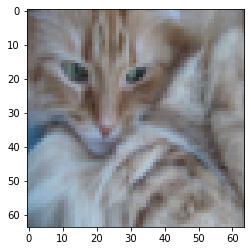

In [4]:
#sample pic
index = 2
plt.imshow(train_set_x_orig[index])
print("y = " +str(train_set_y[:,index]) +", "+classes[np.squeeze(train_set_y[:,index])].decode("utf-8"))

In [5]:
#train_set_x_orig (numberofpic,pix,pix,3 (rgb))
m_train = train_set_x_orig.shape[0] #number of traning 
m_test = test_set_x_orig.shape[0] #n of test
num_px = train_set_x_orig.shape[1]

print("total training example : m_train "+str(m_train))
print("total test example : m_test "+str(m_test))
print("height and width of each image : num_px "+str(num_px))
print("train_set_x_orig shape : "+str(train_set_x_orig.shape))
print("train_set_y label shape row vector : "+ str(train_set_y.shape))
print("test_set_x_orig shape : "+str(test_set_x_orig.shape))
print("test_set_y label shape row vector : "+ str(test_set_y.shape))


total training example : m_train 209
total test example : m_test 50
height and width of each image : num_px 64
train_set_x_orig shape : (209, 64, 64, 3)
train_set_y label shape row vector : (1, 209)
test_set_x_orig shape : (50, 64, 64, 3)
test_set_y label shape row vector : (1, 50)


In [6]:
#flattened image to column vector 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

print("train_set_x_flatten shape : "+ str(train_set_x_flatten.shape))
print("train_set_y label shape row vector : "+ str(train_set_y.shape))
print("test_set_x_flatten shape : "+ str(test_set_x_flatten.shape))
print("test_set_y label shape row vector : "+ str(test_set_y.shape))
print(train_set_x_flatten)

#bisa di lihat dibawah 17,31,56,.. itu merupakan nilai rbg yang di urutkan secara vertikal sehingga setiapa kolom pada matrix merepresentasikan gambar yang berbeda.
#pada dasarnya flaattening bertujuna agar sebuah gambar dengan matrix ( num_px, num_px, 3) mejadi (numpx*numpx*3,1) mejadi column vector
#(a,b,c,d) agar menjadi column vector maka (b*c*d,a), a adalah total sample gambar in this case.

print("\n")
print(str(train_set_x_orig[0].shape)+" : shape dari satu gambar dengan ukuran 64*64 sebanyak 3 kali (red, green, blue) ")

train_set_x_flatten shape : (12288, 209)
train_set_y label shape row vector : (1, 209)
test_set_x_flatten shape : (12288, 50)
test_set_y label shape row vector : (1, 50)
[[ 17 196  82 ... 143  22   8]
 [ 31 192  71 ... 155  24  28]
 [ 56 190  68 ... 165  23  53]
 ...
 [  0  82 138 ...  85   4   0]
 [  0  80 141 ... 107   5   0]
 [  0  81 142 ... 149   0   0]]


(64, 64, 3) : shape dari satu gambar dengan ukuran 64*64 sebanyak 3 kali (red, green, blue) 


In [7]:
#preprocessing
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [8]:
#sigmoid function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [9]:
#step dalam membuat neural network :
#1. menentukan model (input features)
#2. init model parameter
#3. loop(loss, gradient) -> update gradient

In [10]:
print("sigmoid([0,2]) : "+ str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) : [0.5        0.88079708]


In [11]:
def init_zero(x):
    w = np.zeros((x,1))
    b = 0
    assert(isinstance(b,float) or isinstance(b,int))
    
    assert(w.shape == (x,1))
    return w,b

In [12]:
#forward and backward propagation 

def propagate(w,b,X,Y):
    """
    w - weights, numpy array with the size of (numpx*numpx*3,1)
    b - bias, scalar
    X - data (num_px*numpx*3, m)
    Y - label (1, m)
    """
    m = X.shape[1]
    #sigmoid,cost -- forward
    A = sigmoid(np.dot(w.T,X)+b)
    cost = np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))*(-1/m)
    
    #gradient -- backward
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*(np.sum(A-Y))
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    grads = {
        "dw" :dw,
        "db" : db
    }
    return grads, cost

In [13]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [14]:
#we get the cost and the gradient now we optimize it
def optimize(w,b,X,Y,num_iterations,learning_rate,print_cost =False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs =[]
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        
        #ambil gradien
        dw = grads['dw']
        db = grads['db']
        
        #w = w - learningrate*dw
        #b = b - learningrate*db
        
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        if i % 100 == 0 :
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    params = {"w":w,"b":b}
    grads = {"dw":w,"db":db}
    
    return params, grads, costs
        
    

In [15]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.19033591]
 [0.12259159]]
db = 0.21919450454067657


In [16]:
def predict(w,b,X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(m):
        if(A[0,i] > 0.5):
            Y_prediction[0,i] = 1
        elif(A[0,i] <= 0.5 ):
            Y_prediction[0,i] = 0
    assert(Y_prediction.shape == (1,m))
    return Y_prediction

In [17]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [18]:
#model
def model(train_x,train_y, test_x,test_y,num_iteration = 2000, learning_rate = 0.5, print_cost=False):
    w,b = init_zero(train_x.shape[0])
    parameters, grads, costs = optimize(w,b,train_x,train_y,num_iteration,learning_rate,print_cost=False)
    
    w = parameters['w']
    b = parameters['b']
    
    Y_prediction_test = predict(w,b,test_x)
    Y_prediction_train = predict(w,b,train_x)
    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_y)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_y)) * 100))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iteration}
    return d

    

In [19]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iteration = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


(12288, 50)
y = 0, you predicted that it is a "non-cat" picture.


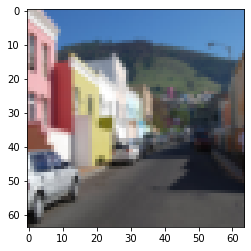

In [36]:
# Example of a picture that was wrongly classified.
index = 1
plt.imshow(train_set_x[:,index].reshape((num_px, num_px, 3)))
print(test_set_x.shape)
print ("y = " + str(train_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(d["Y_prediction_train"][0,index]),].decode("utf-8") +  "\" picture.")